<a href="https://colab.research.google.com/github/NeshPk/NeshPk/blob/main/Twice_ClassificationOfIrises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 【Challenge 1 】 Select characterization and category for practice & DATA ANALYSIS

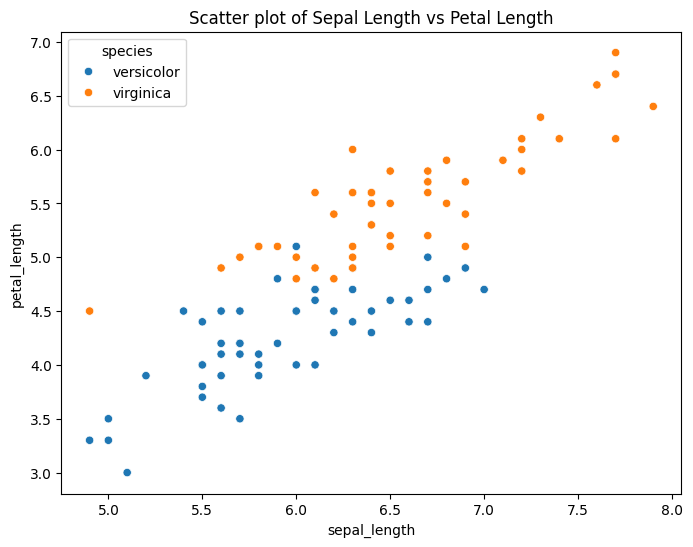

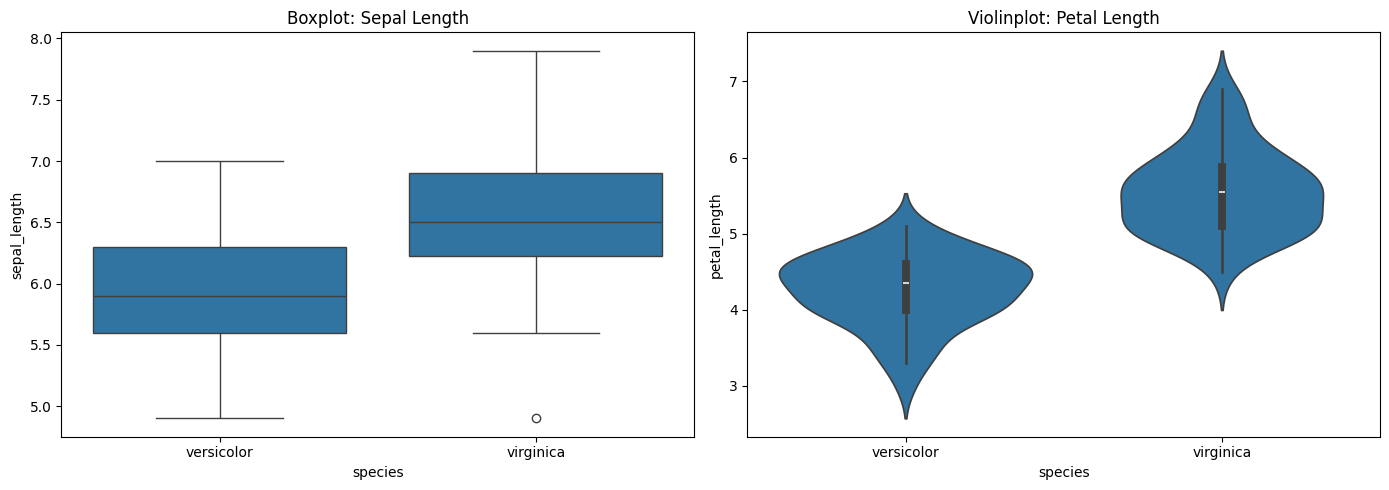

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = sns.load_dataset("iris")

# Select only versicolor and virginica
binary_iris = iris[iris['species'].isin(['versicolor', 'virginica'])]

# Choose two features for visualization and analysis
X = binary_iris[['sepal_length', 'petal_length']].values
y = binary_iris['species'].map({'versicolor': 0, 'virginica': 1}).values  # convert to 0 and 1

plt.figure(figsize=(8, 6))
sns.scatterplot(x=binary_iris['sepal_length'], y=binary_iris['petal_length'], hue=binary_iris['species'])
plt.title("Scatter plot of Sepal Length vs Petal Length")
plt.show()

plt.figure(figsize=(14, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=binary_iris, x='species', y='sepal_length')
plt.title('Boxplot: Sepal Length')

# Violinplot
plt.subplot(1, 2, 2)
sns.violinplot(data=binary_iris, x='species', y='petal_length')
plt.title('Violinplot: Petal Length')

plt.tight_layout()
plt.show()


【Problem 3 】 Split pretreatment and training data and validation data

In [5]:
from sklearn.preprocessing import StandardScaler

# Split: 75% training, 25% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features (important for many ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


Question 4】 Pre- ⁇ Identification

In [6]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit ONLY on training data
scaler.fit(X_train)

# Transform both training and validation sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

import numpy as np

print("Mean of training set (after scaling):", np.mean(X_train_scaled, axis=0))
print("Standard deviation of training set (after scaling):", np.std(X_train_scaled, axis=0))


Mean of training set (after scaling): [-1.64609067e-15 -8.61533067e-16]
Standard deviation of training set (after scaling): [1. 1.]


【Problem 5 】 Learning and estimation

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Try 1-NN, 3-NN, 5-NN
k_values = [1, 3, 5]

for k in k_values:
    print(f"\n=== {k}-NN ===")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)         # Train the model
    y_pred = knn.predict(X_val_scaled)       # Predict on validation data

    # Evaluate
    from sklearn.metrics import accuracy_score, classification_report
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
    print(classification_report(y_val, y_pred, target_names=['versicolor', 'virginica']))



=== 1-NN ===
Accuracy: 0.80
              precision    recall  f1-score   support

  versicolor       0.80      0.86      0.83        14
   virginica       0.80      0.73      0.76        11

    accuracy                           0.80        25
   macro avg       0.80      0.79      0.79        25
weighted avg       0.80      0.80      0.80        25


=== 3-NN ===
Accuracy: 0.80
              precision    recall  f1-score   support

  versicolor       0.80      0.86      0.83        14
   virginica       0.80      0.73      0.76        11

    accuracy                           0.80        25
   macro avg       0.80      0.79      0.79        25
weighted avg       0.80      0.80      0.80        25


=== 5-NN ===
Accuracy: 0.80
              precision    recall  f1-score   support

  versicolor       0.76      0.93      0.84        14
   virginica       0.88      0.64      0.74        11

    accuracy                           0.80        25
   macro avg       0.82      0.78      0.

【Problem 6 】 Rating

Accuracy: 0.80
Precision: 0.88
Recall: 0.64
F1 Score: 0.74


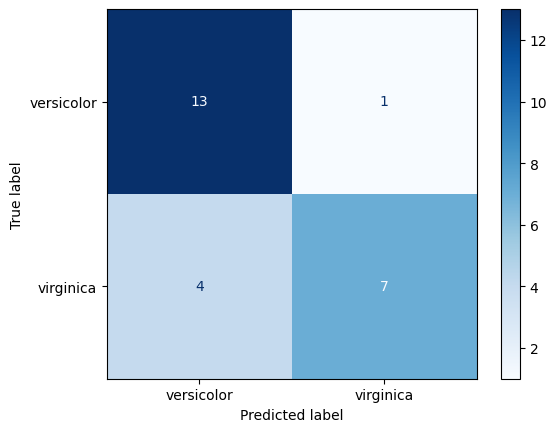

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate metrics
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print them out
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['versicolor', 'virginica'])
disp.plot(cmap='Blues')


【Question 7】VisualizationVisualize as consistent in your evaluation


===== 1-NN Evaluation =====
Accuracy : 0.84
Precision: 0.85
Recall   : 0.85
F1 Score : 0.85

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.85      0.85      0.85        13
   virginica       0.83      0.83      0.83        12

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



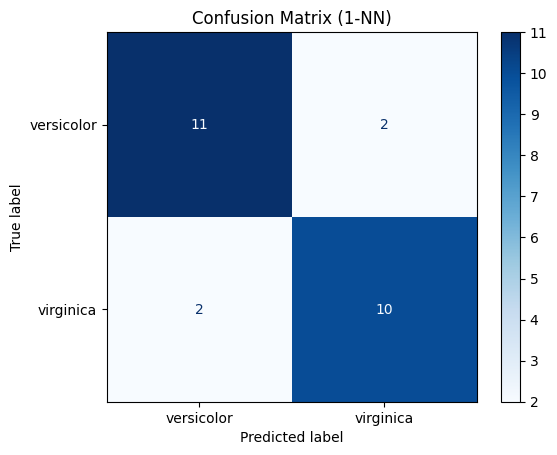

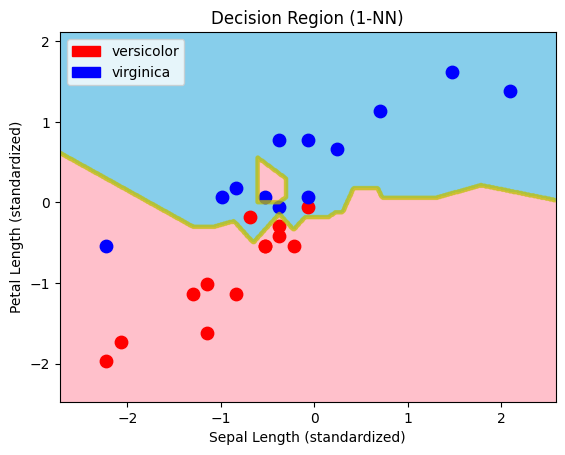


===== 3-NN Evaluation =====
Accuracy : 0.80
Precision: 0.90
Recall   : 0.69
F1 Score : 0.78

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.90      0.69      0.78        13
   virginica       0.73      0.92      0.81        12

    accuracy                           0.80        25
   macro avg       0.82      0.80      0.80        25
weighted avg       0.82      0.80      0.80        25



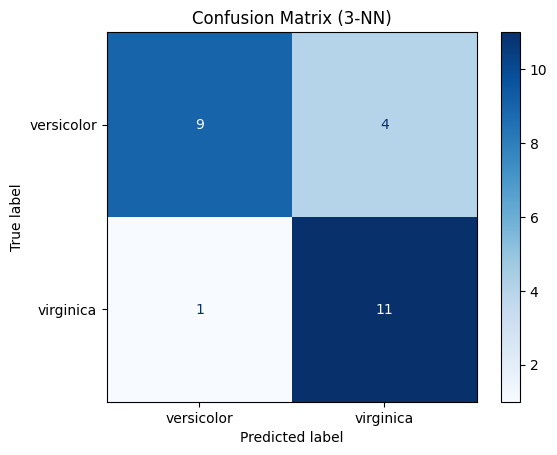

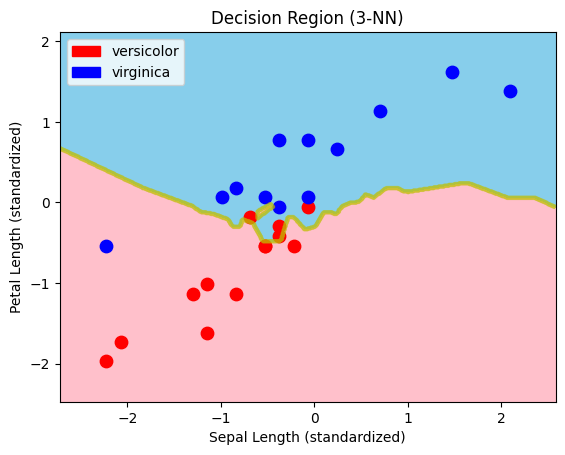


===== 5-NN Evaluation =====
Accuracy : 0.84
Precision: 0.91
Recall   : 0.77
F1 Score : 0.83

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.91      0.77      0.83        13
   virginica       0.79      0.92      0.85        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



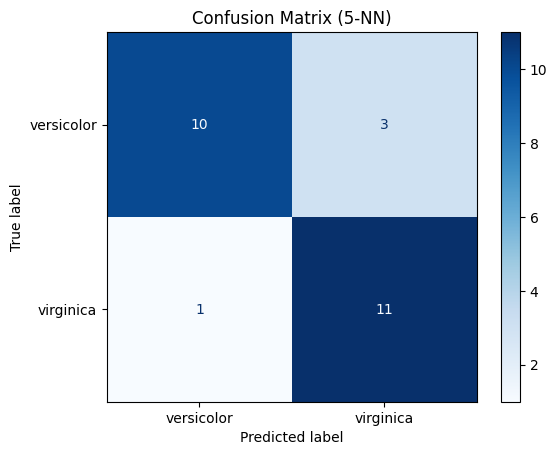

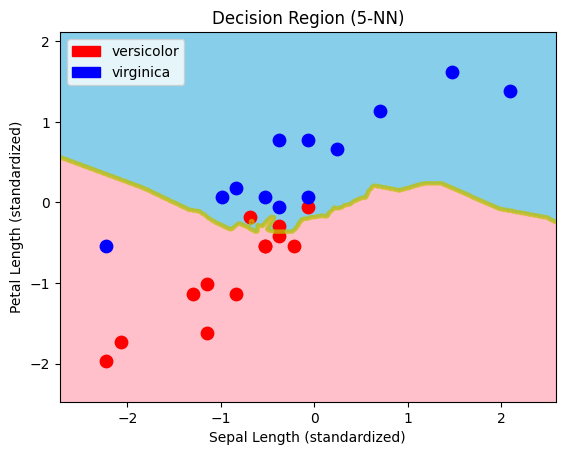

In [9]:
# ========== 1. Import libraries ==========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# ========== 2. Load and prepare data ==========
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda i: iris.target_names[i])

# Select only versicolor (1) and virginica (2)
df = df[df['target'].isin([1, 2])]

# Use only sepal length and petal length
X = df[['sepal length (cm)', 'petal length (cm)']].values
y = df['target'].values



# ========== 4. Train/test split ==========
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ========== 5. Standardization ==========
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ========== 6. Define decision region function ==========
def decision_region(X, y, model, step=0.01, title='Decision Region',
                    xlabel='Sepal Length (standardized)', ylabel='Petal Length (standardized)',
                    target_names=['versicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class - 1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1], s=80,
                    color=scatter_color[i], label=target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

# ========== 7. Train and evaluate k-NN models ==========
k_values = [1, 3, 5]

for k in k_values:
    print(f"\n===== {k}-NN Evaluation =====")
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1 Score : {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=['versicolor', 'virginica']))

    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['versicolor', 'virginica'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({k}-NN)')
    plt.show()

    decision_region(X_val_scaled, y_val, model, title=f'Decision Region ({k}-NN)')


【Problem 8 】 Learning other methods.


===== 1-NN Evaluation =====
Accuracy : 0.84
Precision: 0.85
Recall   : 0.85
F1 Score : 0.85

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.85      0.85      0.85        13
   virginica       0.83      0.83      0.83        12

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



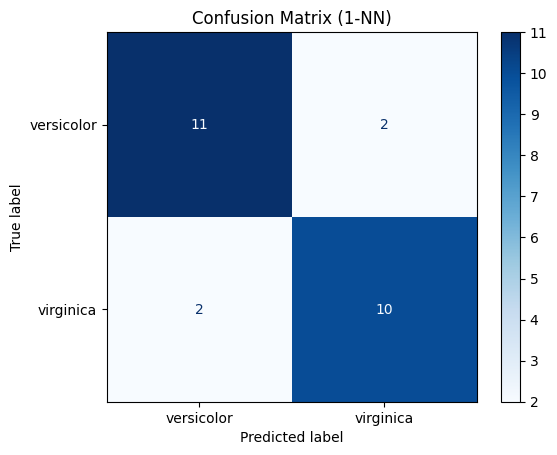

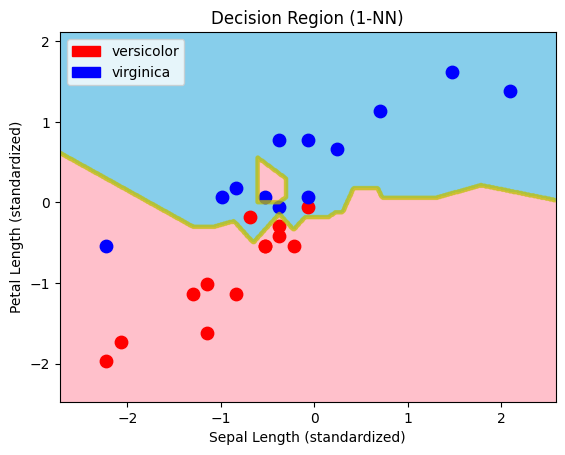


===== 3-NN Evaluation =====
Accuracy : 0.80
Precision: 0.90
Recall   : 0.69
F1 Score : 0.78

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.90      0.69      0.78        13
   virginica       0.73      0.92      0.81        12

    accuracy                           0.80        25
   macro avg       0.82      0.80      0.80        25
weighted avg       0.82      0.80      0.80        25



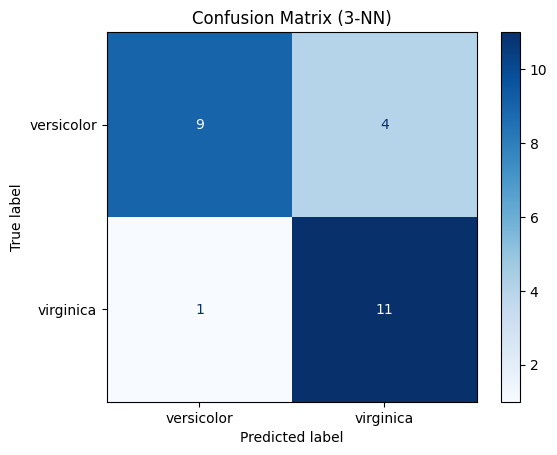

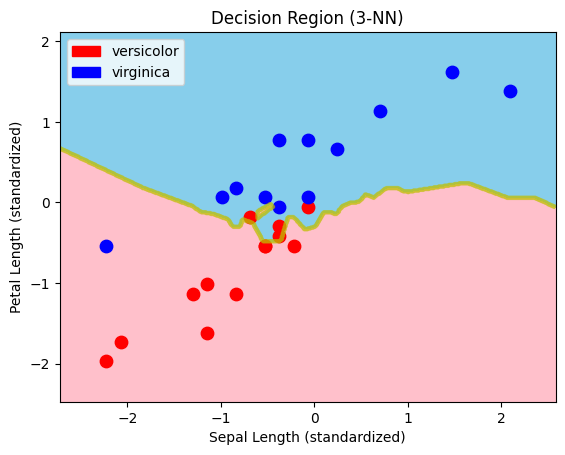


===== 5-NN Evaluation =====
Accuracy : 0.84
Precision: 0.91
Recall   : 0.77
F1 Score : 0.83

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.91      0.77      0.83        13
   virginica       0.79      0.92      0.85        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



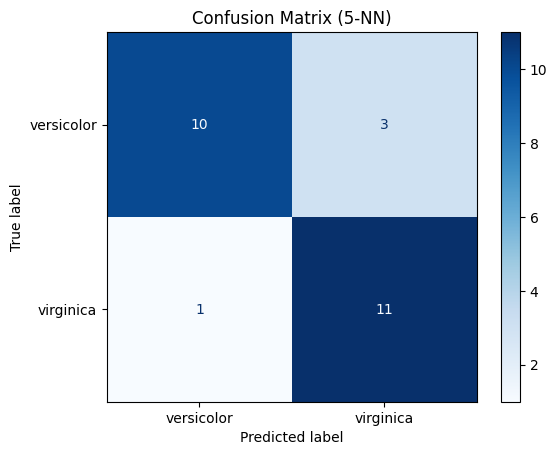

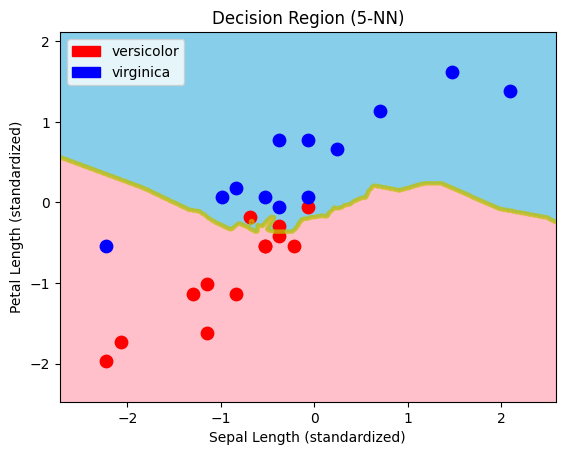


===== Logistic Regression Evaluation =====
Accuracy : 0.92
Precision: 0.92
Recall   : 0.92
F1 Score : 0.92

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



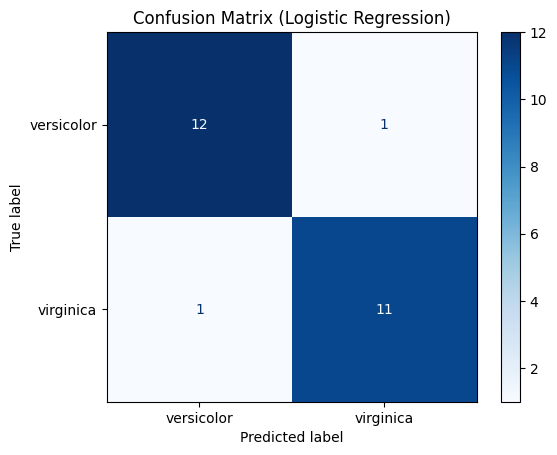

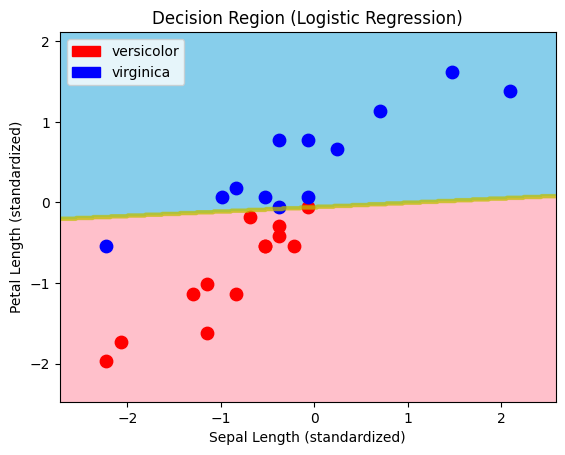


===== SVM Evaluation =====
Accuracy : 0.88
Precision: 0.92
Recall   : 0.85
F1 Score : 0.88

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.92      0.85      0.88        13
   virginica       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



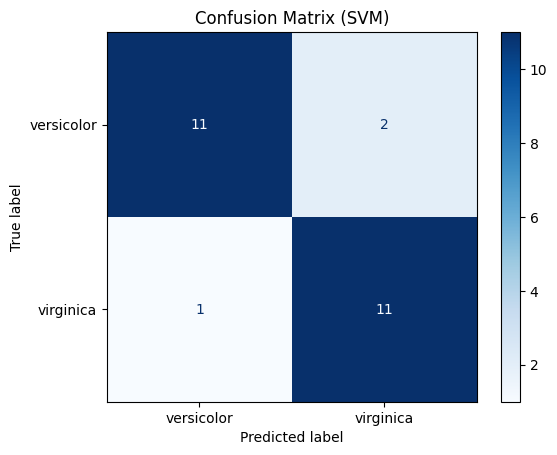

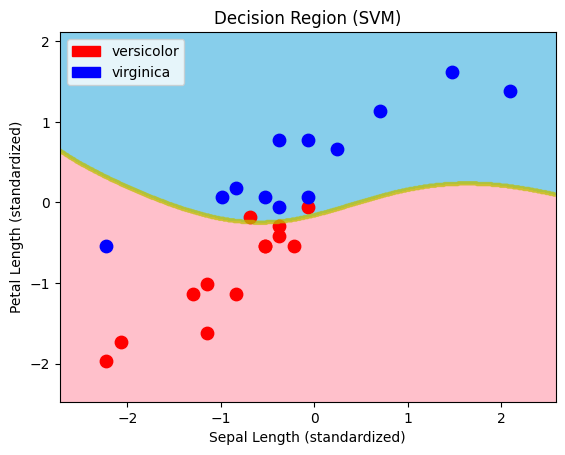


===== Decision Tree Evaluation =====
Accuracy : 0.84
Precision: 0.85
Recall   : 0.85
F1 Score : 0.85

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.85      0.85      0.85        13
   virginica       0.83      0.83      0.83        12

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



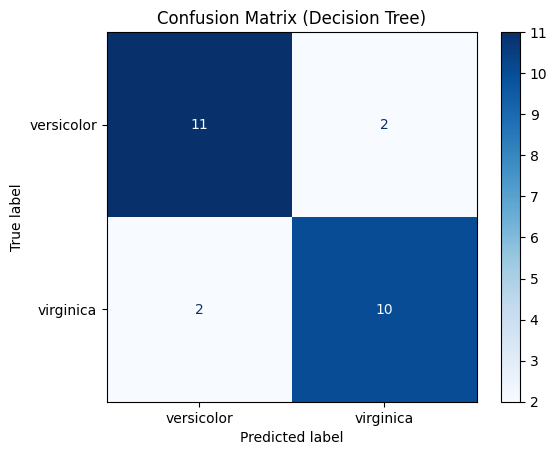

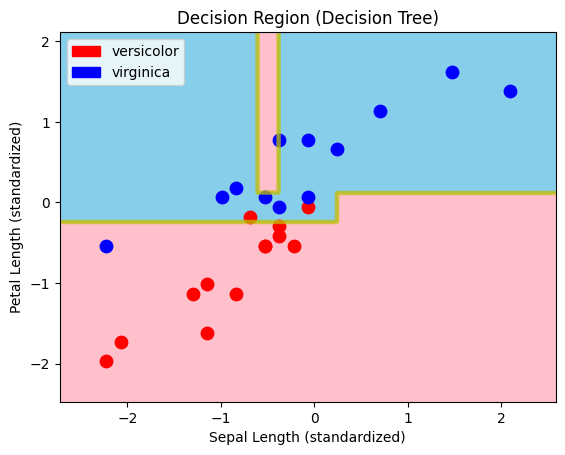


===== Random Forest Evaluation =====
Accuracy : 0.88
Precision: 0.92
Recall   : 0.85
F1 Score : 0.88

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.92      0.85      0.88        13
   virginica       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



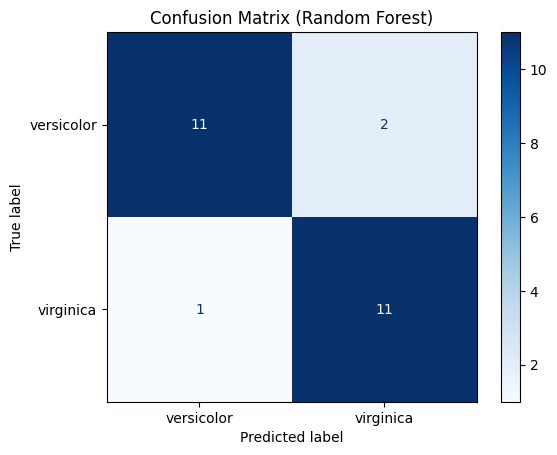

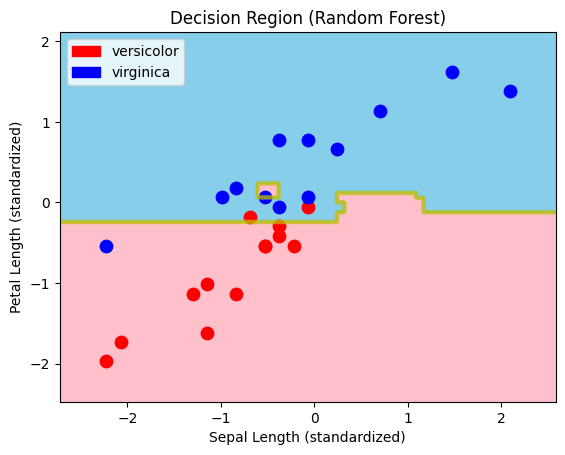


========= Evaluation Summary =========

              Model  Accuracy  Precision   Recall  F1 Score
Logistic Regression      0.92   0.923077 0.923077  0.923077
                SVM      0.88   0.916667 0.846154  0.880000
      Random Forest      0.88   0.916667 0.846154  0.880000
               1-NN      0.84   0.846154 0.846154  0.846154
      Decision Tree      0.84   0.846154 0.846154  0.846154
               5-NN      0.84   0.909091 0.769231  0.833333
               3-NN      0.80   0.900000 0.692308  0.782609


In [10]:
# 1. Import additional models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Define models in a dictionary
models = {
    "1-NN": KNeighborsClassifier(n_neighbors=1),
    "3-NN": KNeighborsClassifier(n_neighbors=3),
    "5-NN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# 3. Initialize score table
score_table = []

# 4. Train, predict, evaluate, visualize
for name, model in models.items():
    print(f"\n===== {name} Evaluation =====")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    score_table.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1 Score : {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=['versicolor', 'virginica']))

    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['versicolor', 'virginica'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({name})')
    plt.show()

    decision_region(X_val_scaled, y_val, model, title=f'Decision Region ({name})')

# 5. Show comparison table
results_df = pd.DataFrame(score_table)
print("\n========= Evaluation Summary =========\n")
print(results_df.sort_values(by='F1 Score', ascending=False).to_string(index=False))


【Problem 9 】 (Advance Challenge) Comparison with or without standardization

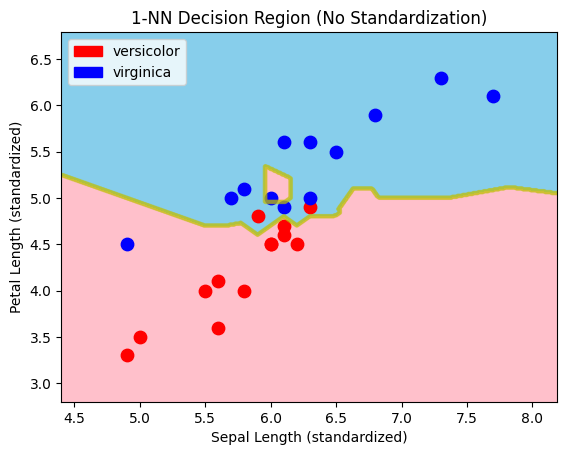

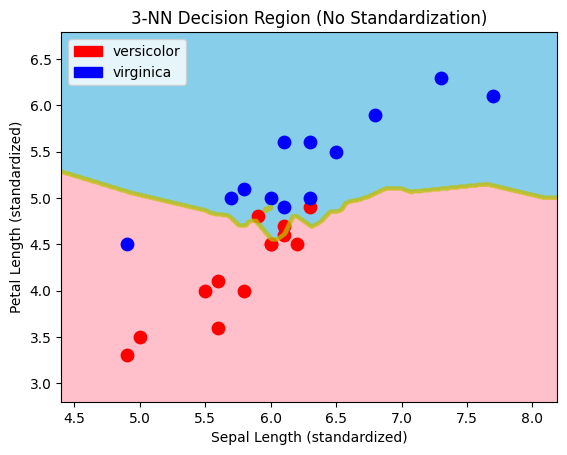

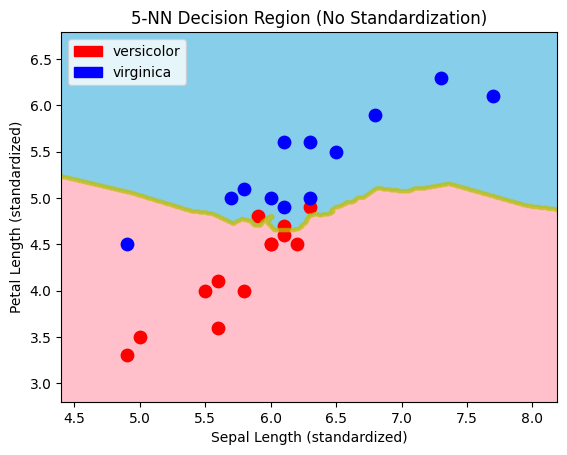

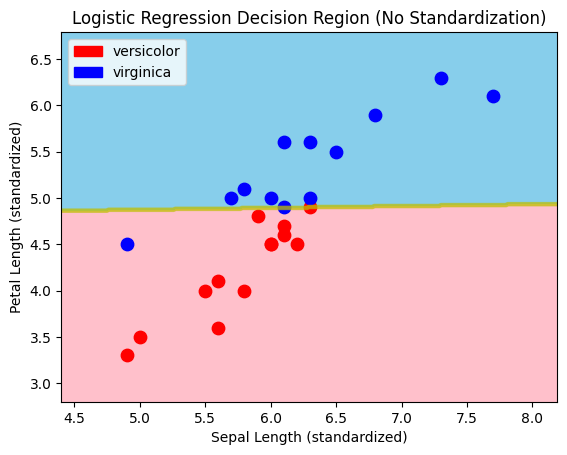

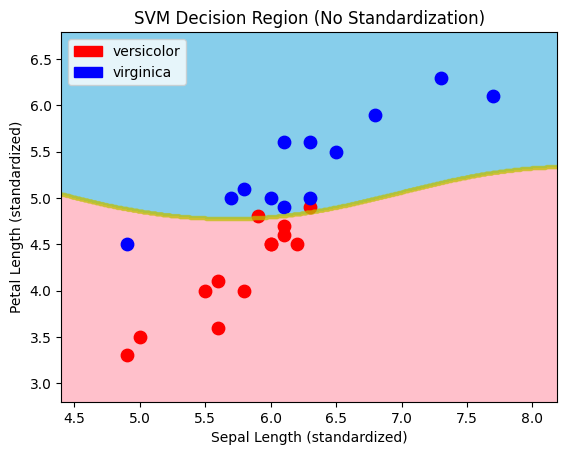

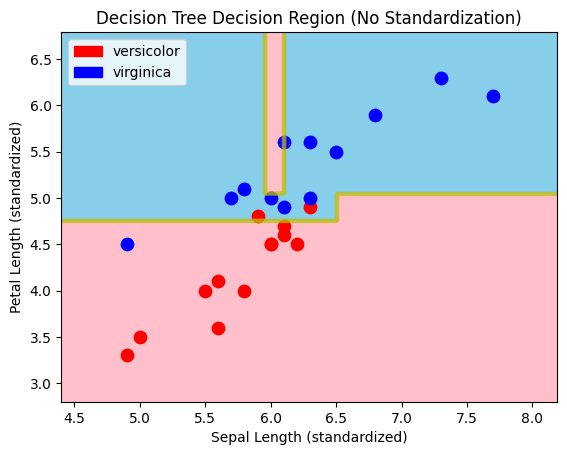

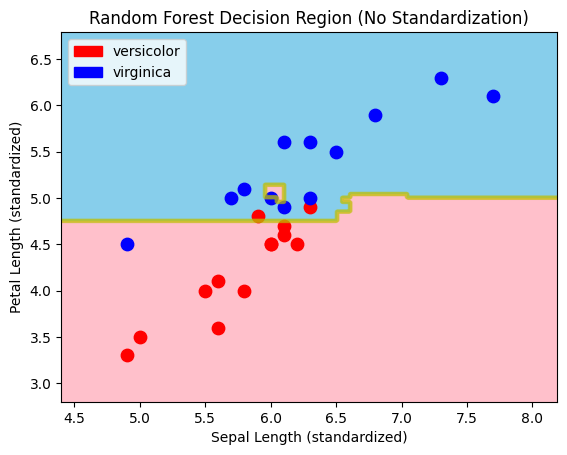

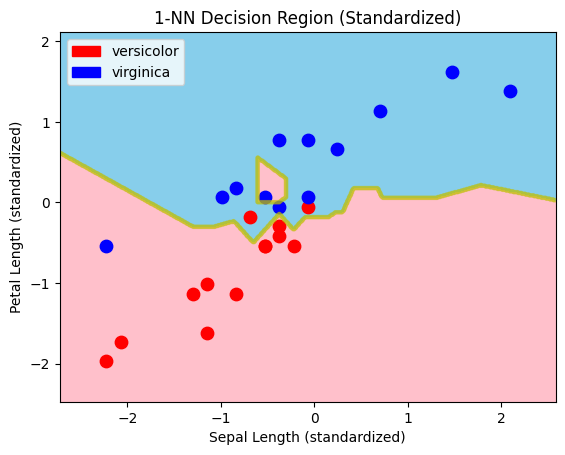

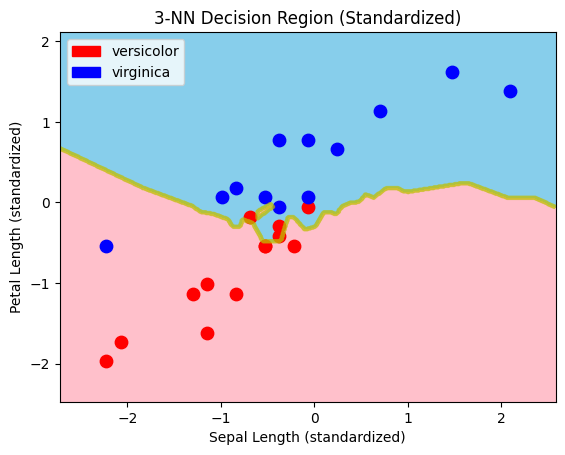

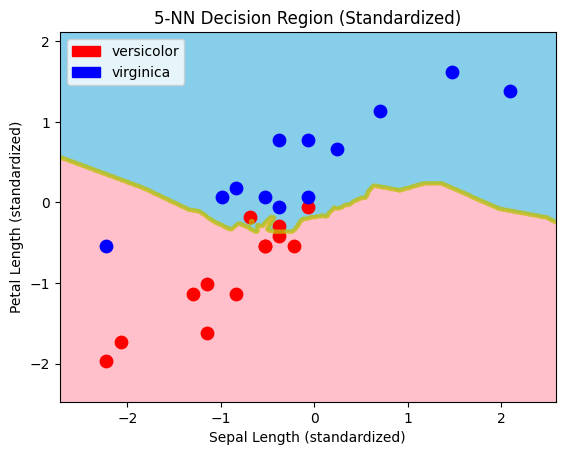

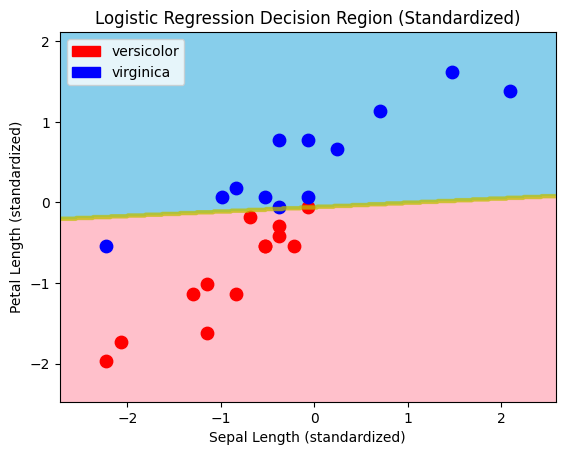

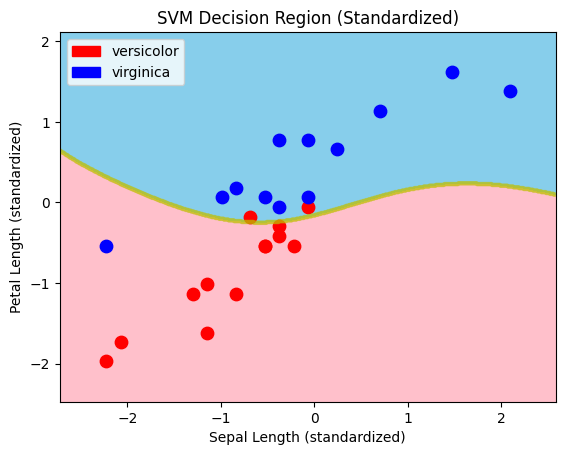

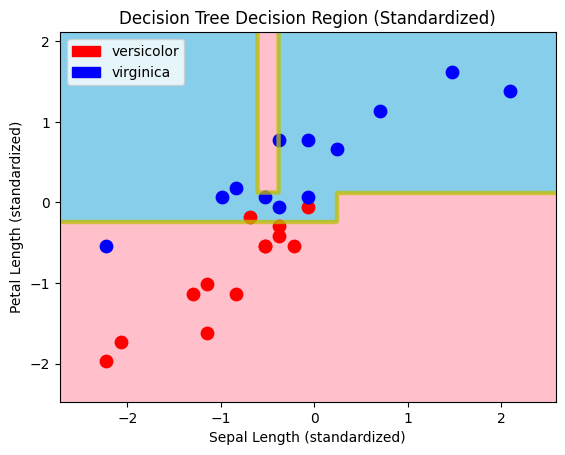

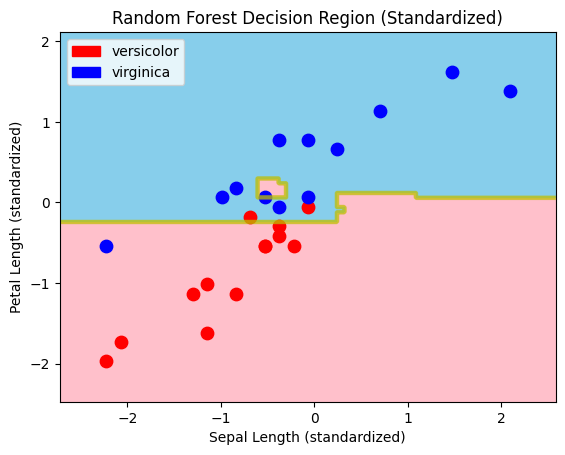


======= Standardization Comparison Table =======

              Model  Accuracy  Precision   Recall  F1 Score       Standardized
               1-NN      0.84   0.846154 0.846154  0.846154 No Standardization
               1-NN      0.84   0.846154 0.846154  0.846154       Standardized
               3-NN      0.84   0.909091 0.769231  0.833333 No Standardization
               3-NN      0.80   0.900000 0.692308  0.782609       Standardized
               5-NN      0.84   0.909091 0.769231  0.833333 No Standardization
               5-NN      0.84   0.909091 0.769231  0.833333       Standardized
      Decision Tree      0.84   0.846154 0.846154  0.846154 No Standardization
      Decision Tree      0.84   0.846154 0.846154  0.846154       Standardized
Logistic Regression      0.96   0.928571 1.000000  0.962963 No Standardization
Logistic Regression      0.92   0.923077 0.923077  0.923077       Standardized
      Random Forest      0.88   0.916667 0.846154  0.880000 No Standardization
 

In [11]:
# Define a function to run model training/evaluation pipeline
def evaluate_models(X_train, X_val, y_train, y_val, title_suffix=''):
    models = {
        "1-NN": KNeighborsClassifier(n_neighbors=1),
        "3-NN": KNeighborsClassifier(n_neighbors=3),
        "5-NN": KNeighborsClassifier(n_neighbors=5),
        "Logistic Regression": LogisticRegression(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "Standardized": title_suffix
        })

        # Plot decision region
        decision_region(X_val, y_val, model, title=f'{name} Decision Region ({title_suffix})')

    return results
# 1. Without Standardization
results_no_std = evaluate_models(X_train, X_val, y_train, y_val, title_suffix='No Standardization')

# 2. With Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
results_std = evaluate_models(X_train_scaled, X_val_scaled, y_train, y_val, title_suffix='Standardized')
# Combine and display
results_combined = pd.DataFrame(results_no_std + results_std)
print("\n======= Standardization Comparison Table =======\n")
print(results_combined.sort_values(by=['Model', 'Standardized']).to_string(index=False))



===== K-NN (k=5) Evaluation =====

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Micro Average Precision: 0.97
Macro Average Precision: 0.97
Micro Average Recall   : 0.97
Macro Average Recall   : 0.97
Micro Average F1 Score : 0.97
Macro Average F1 Score : 0.97


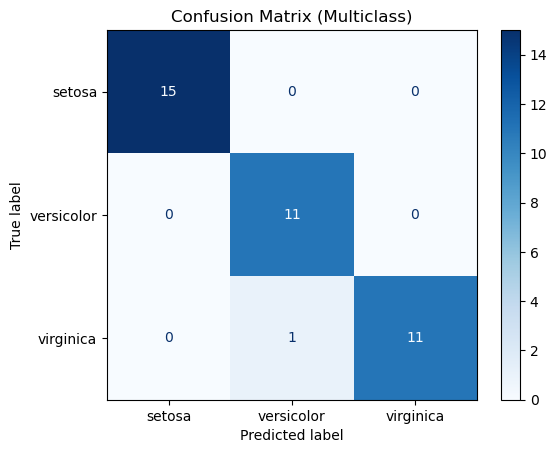

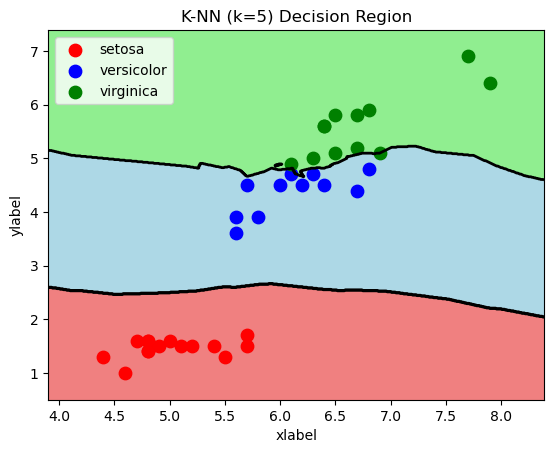


===== Logistic Regression Evaluation =====

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Micro Average Precision: 1.00
Macro Average Precision: 1.00
Micro Average Recall   : 1.00
Macro Average Recall   : 1.00
Micro Average F1 Score : 1.00
Macro Average F1 Score : 1.00


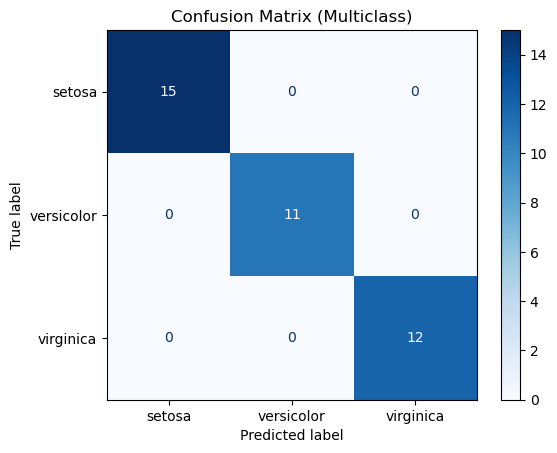

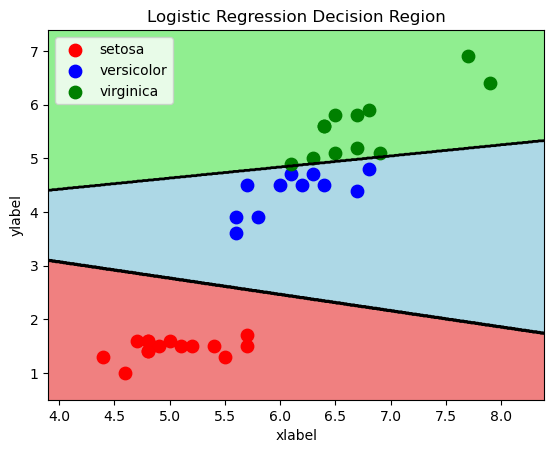


===== SVM Evaluation =====

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Micro Average Precision: 1.00
Macro Average Precision: 1.00
Micro Average Recall   : 1.00
Macro Average Recall   : 1.00
Micro Average F1 Score : 1.00
Macro Average F1 Score : 1.00


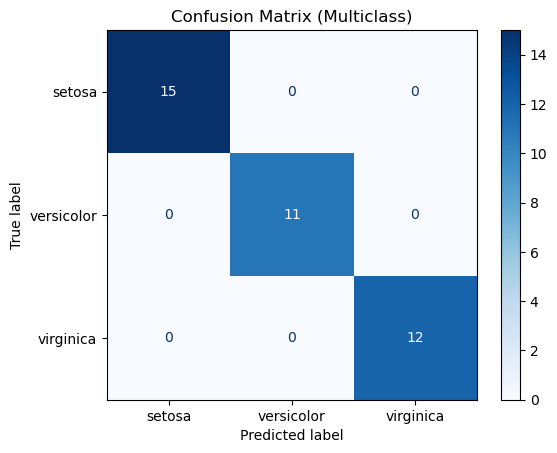

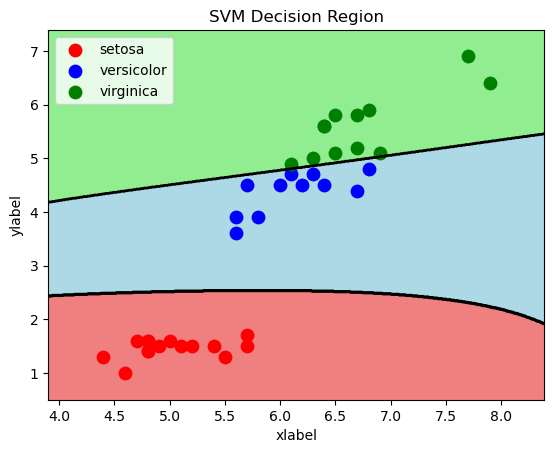


===== Decision Tree Evaluation =====

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Micro Average Precision: 1.00
Macro Average Precision: 1.00
Micro Average Recall   : 1.00
Macro Average Recall   : 1.00
Micro Average F1 Score : 1.00
Macro Average F1 Score : 1.00


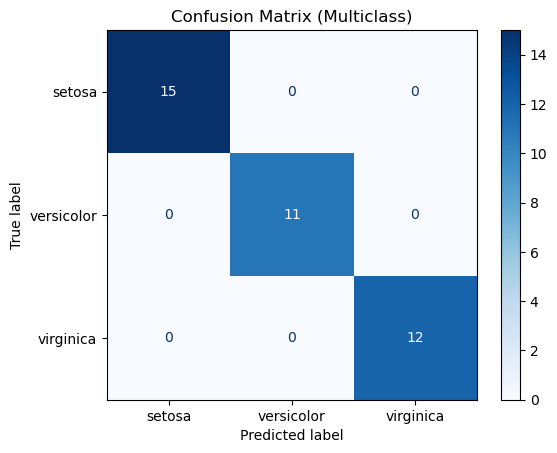

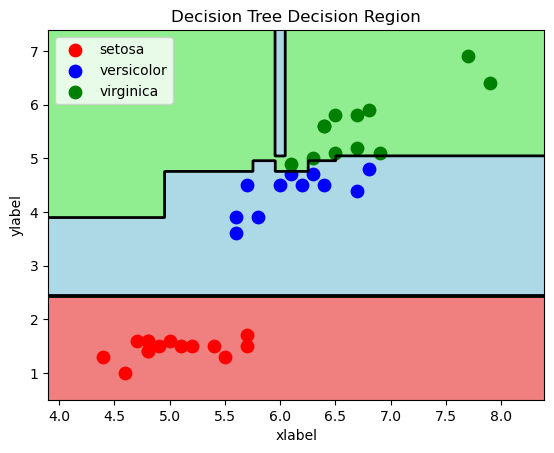


===== Random Forest Evaluation =====

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Micro Average Precision: 1.00
Macro Average Precision: 1.00
Micro Average Recall   : 1.00
Macro Average Recall   : 1.00
Micro Average F1 Score : 1.00
Macro Average F1 Score : 1.00


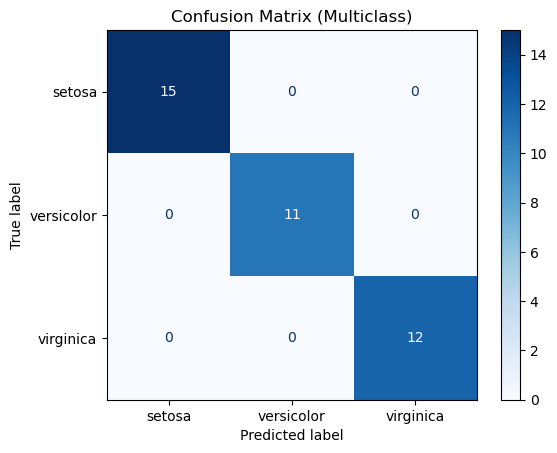

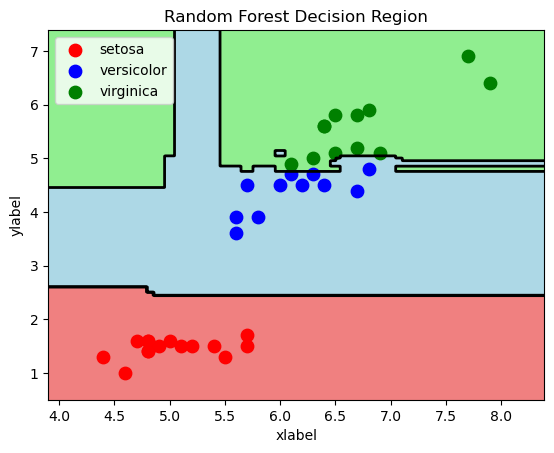


======= Evaluation Summary =======
              Model  Accuracy  Micro Precision  Macro Precision  Micro Recall  Macro Recall  Micro F1  Macro F1
Logistic Regression  1.000000         1.000000         1.000000      1.000000      1.000000  1.000000  1.000000
                SVM  1.000000         1.000000         1.000000      1.000000      1.000000  1.000000  1.000000
      Decision Tree  1.000000         1.000000         1.000000      1.000000      1.000000  1.000000  1.000000
      Random Forest  1.000000         1.000000         1.000000      1.000000      1.000000  1.000000  1.000000
         K-NN (k=5)  0.973684         0.973684         0.972222      0.973684      0.972222  0.973684  0.971014


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_multiclass(y_true, y_pred):
    # Micro average and macro average metrics
    micro_prec = precision_score(y_true, y_pred, average='micro')
    macro_prec = precision_score(y_true, y_pred, average='macro')
    micro_rec = recall_score(y_true, y_pred, average='micro')
    macro_rec = recall_score(y_true, y_pred, average='macro')
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    macro_f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Micro Average Precision: {micro_prec:.2f}")
    print(f"Macro Average Precision: {macro_prec:.2f}")
    print(f"Micro Average Recall   : {micro_rec:.2f}")
    print(f"Macro Average Recall   : {macro_rec:.2f}")
    print(f"Micro Average F1 Score : {micro_f1:.2f}")
    print(f"Macro Average F1 Score : {macro_f1:.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa', 'versicolor', 'virginica'])
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix (Multiclass)')
    plt.show()

def decision_region_multiclass(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    n_class = len(np.unique(y))
    scatter_colors = ['red', 'blue', 'green']
    contourf_colors = ['lightcoral', 'lightblue', 'lightgreen']

    # Create meshgrid for decision region
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Plot decision regions
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_colors))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='k', linewidths=2)

    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_colors[i], label=target_names[i], marker='o')

    plt.legend()
    plt.show()

# Use only 2 features: sepal_length and petal_length
X = iris.data[:, [0, 2]]  # Columns 0 and 2 correspond to sepal_length and petal_length
y = iris.target

# Split the data into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Now you can train and predict with the 2 selected features

# Define models
models = {
    "K-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store results
score_table = []

# Train, predict, evaluate
for name, model in models.items():
    print(f"\n===== {name} Evaluation =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Evaluate metrics
    print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=iris.target_names))
    evaluate_multiclass(y_val, y_pred)

    # Plot decision region
    decision_region_multiclass(X_val, y_val, model, title=f'{name} Decision Region')

    # Store results
    score_table.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Micro Precision": precision_score(y_val, y_pred, average='micro'),
        "Macro Precision": precision_score(y_val, y_pred, average='macro'),
        "Micro Recall": recall_score(y_val, y_pred, average='micro'),
        "Macro Recall": recall_score(y_val, y_pred, average='macro'),
        "Micro F1": f1_score(y_val, y_pred, average='micro'),
        "Macro F1": f1_score(y_val, y_pred, average='macro')
    })

# Display results in a table
results_df = pd.DataFrame(score_table)
print("\n======= Evaluation Summary =======")
print(results_df.sort_values(by='Macro F1', ascending=False).to_string(index=False))

